In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('03_Clustering_Marketing - httpswww.kaggle.comdatasetszabihullah18students-social-network-profile-clustering.csv')

In [3]:
#cleaning data, making mean age to fill all NaN's for age

In [4]:
row_index = 3

In [5]:
df_drop = df.dropna(subset=[df.columns[row_index]])

In [6]:
df_drop['age'] = df_drop['age'].replace('[^\d.]', '', regex=True).astype(float)

In [7]:
average_age = df_drop['age'].mean()

In [8]:
average_age #found mean of age

17.967152511196414

In [9]:
df['age'] = pd.to_numeric(df['age'], errors='coerce') #turning non-numeric answers in age column to NaN to fill in with average age

In [10]:
df['age'].fillna(average_age, inplace=True)

In [11]:
#turning gender column into numerical numbers

In [12]:
df['gender'] = df['gender'].fillna(0)

In [13]:
df['gender'] = df['gender'].replace({'F': 1, 'M': 2})

In [14]:
nan_values = df.isna().any().any()  # Making sure I have no more NaN's in dataset

if nan_values:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


*Exploratory Data Analysis (EDA)*

In [15]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   gradyear  gender        age  NumberOffriends  basketball  football  soccer  \
0      2007       0  17.967153                0           0         0       0   
1      2007       1  17.410000               49           0         0       1   
2      2007       1  17.511000               41           0         0       0   
3      2006       1  17.967153               36           0         0       0   
4      2008       1  16.657000                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die 

In [16]:
interest_cols = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
                 'baseball', 'tennis', 'sports', 'cute', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching',
                 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
                 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

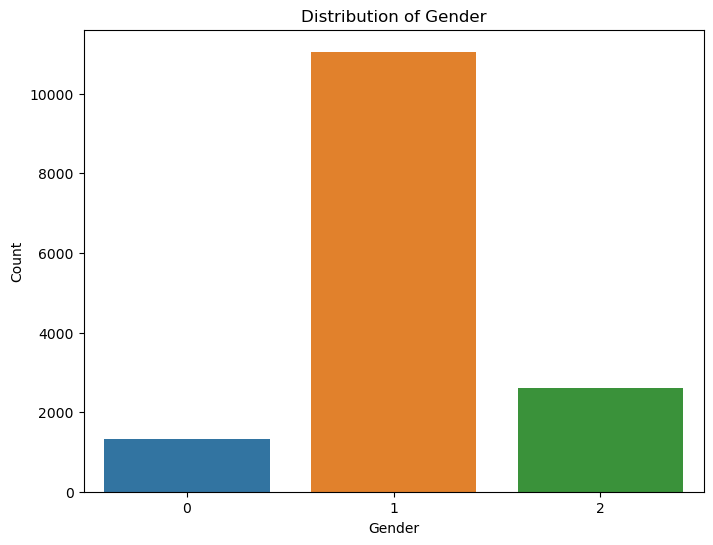

In [19]:
# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

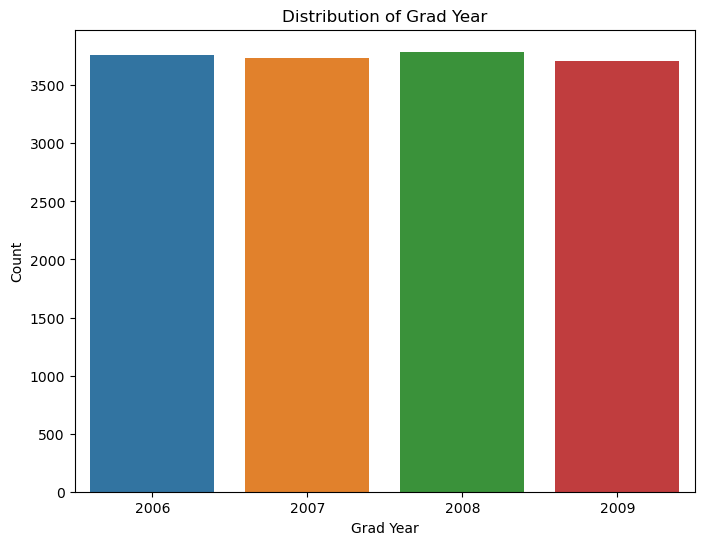

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gradyear', data=df)
plt.title('Distribution of Grad Year')
plt.xlabel('Grad Year')
plt.ylabel('Count')
plt.show()

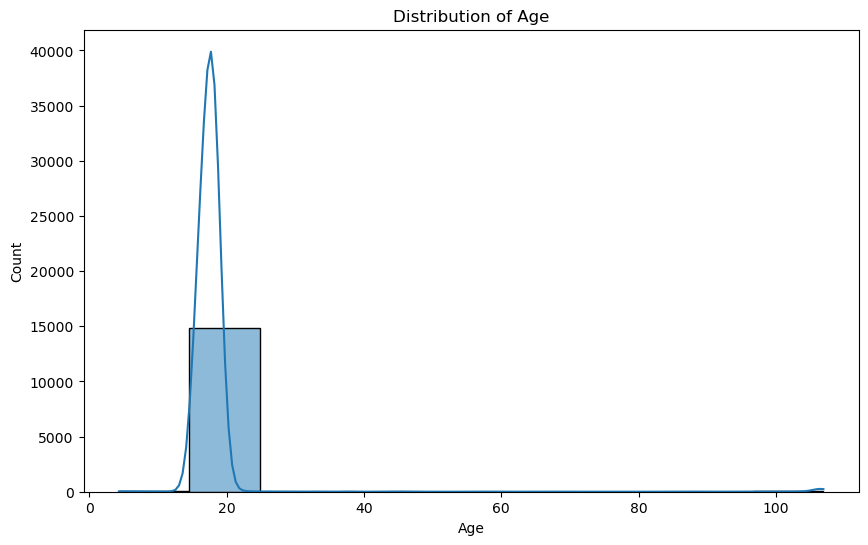

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [22]:
interest_freq = {col: df[col].sum() for col in interest_cols}

In [45]:
top_interest = sorted(interest_freq.items(), key=lambda x: x[1], reverse=True)[:10]

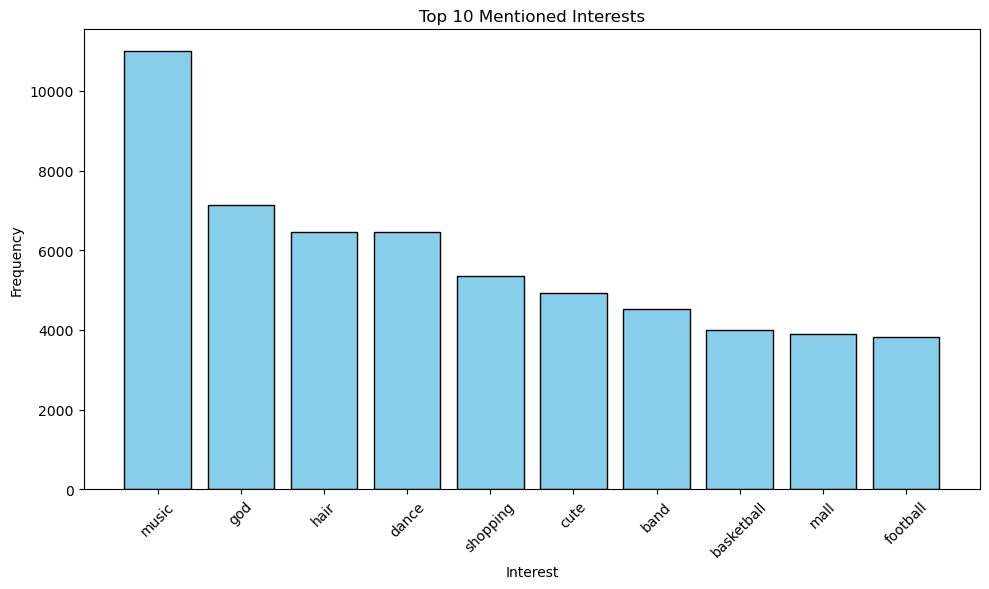

In [24]:
plt.figure(figsize=(10, 6))
plt.bar([col[0] for col in top_interest], [col[1] for col in top_interest], color='skyblue', edgecolor='black')
plt.title('Top 10 Mentioned Interests')
plt.xlabel('Interest')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
interest_cols_by_year = df.groupby('gradyear')[interest_cols].sum()

In [49]:
activity_totals = df[interest_cols].sum()

In [61]:
top_10_activities = activity_totals.nlargest(10).index

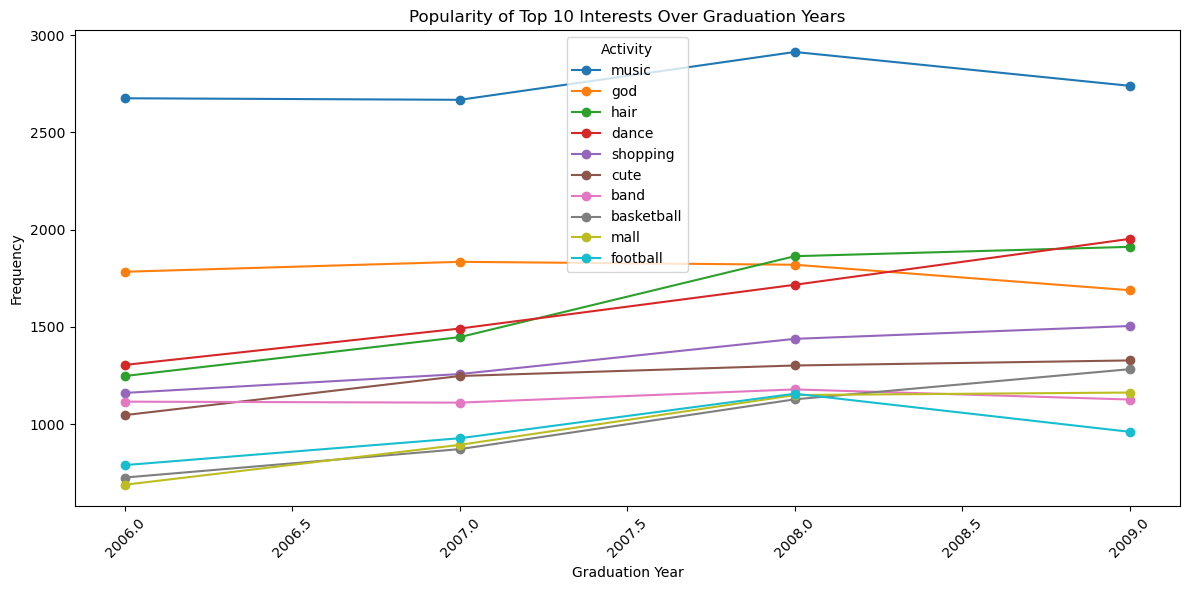

In [53]:
interest_cols_by_year[top_10_activities].plot(marker='o', figsize=(12, 6))
plt.title('Popularity of Top 10 Interests Over Graduation Years')
plt.xlabel('Graduation Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

<Figure size 5000x2500 with 0 Axes>

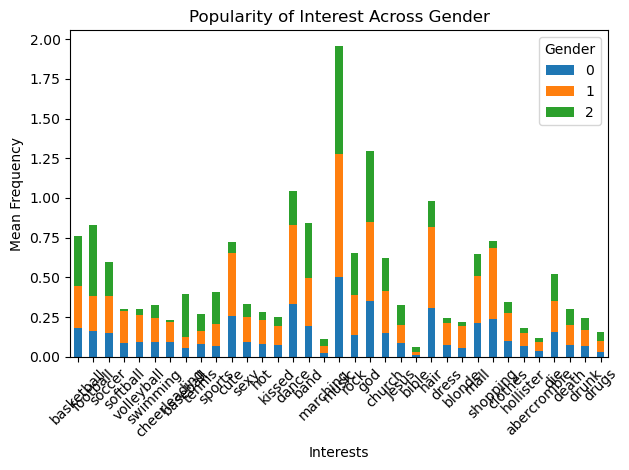

In [65]:
plt.figure(figsize=(50, 25))
df[interest_cols + ['gender']].groupby('gender').mean().T.plot(kind='bar', stacked=True)
plt.title('Popularity of Interest Across Gender')
plt.xlabel('Interests')
plt.ylabel('Mean Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

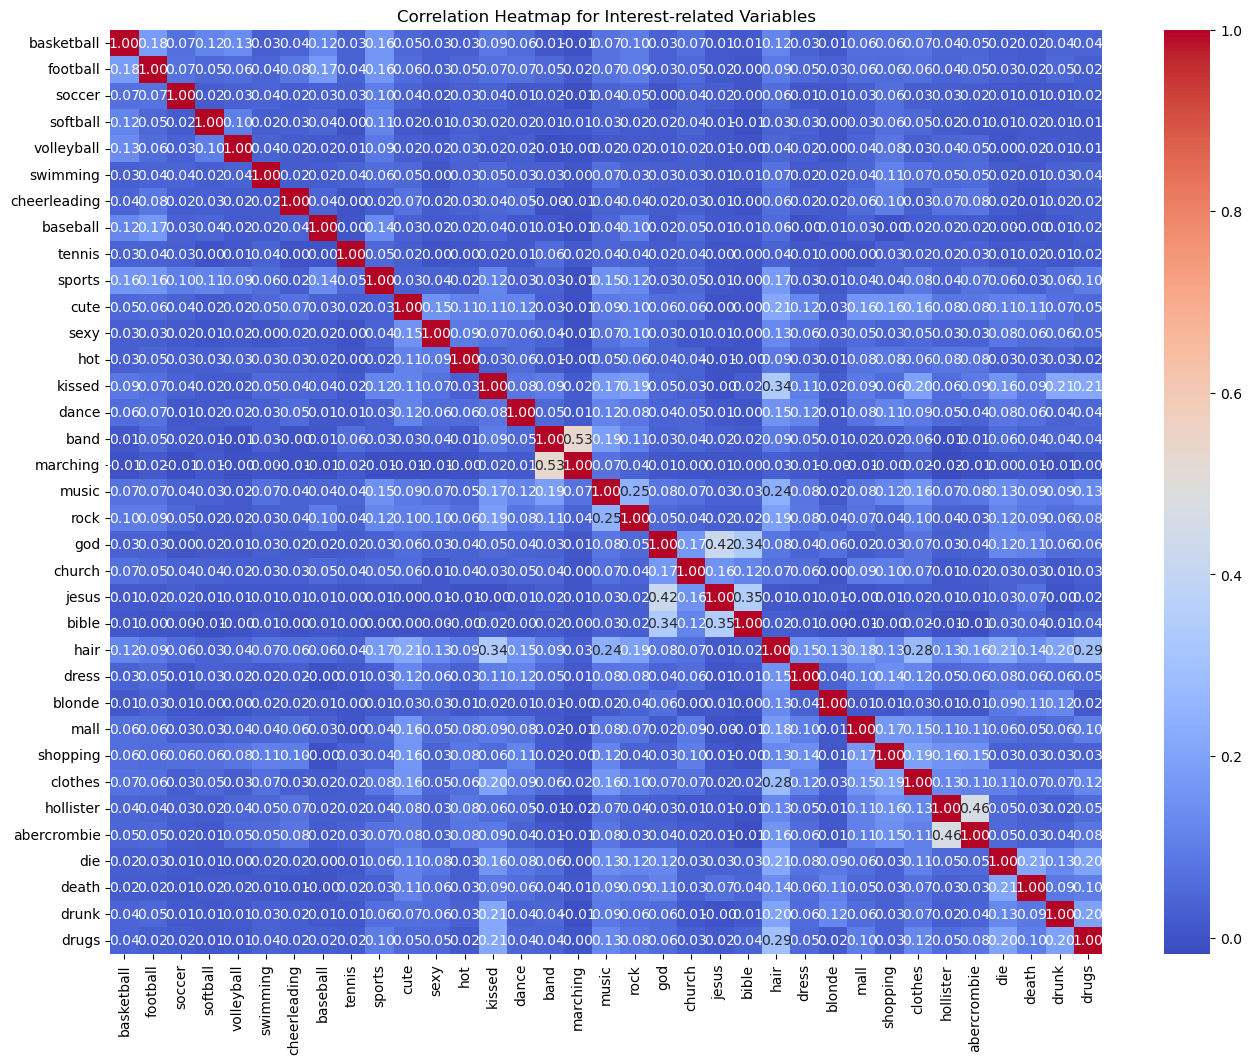

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[interest_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Interest-related Variables')
plt.show()

*Model Creation*

In [66]:
#Creating train/test to determine popularity of activities

In [67]:
df_2 = df.drop(columns=['gradyear', 'gender', 'age', 'NumberOffriends'])

In [68]:
df_3 = df[['gradyear', 'gender', 'age', 'NumberOffriends']]

In [69]:
X = df_3  # Features
y = df_2  # Target variable

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (12000, 4) (12000, 36)
Testing set shape: (3000, 4) (3000, 36)


In [72]:
#Training Model

In [73]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [74]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
#Evaluating Model

In [76]:
y_pred = model.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0750127531446791


In [78]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores)**0.5  
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [1.26390804 1.12035605 0.80341967 0.77401812 0.76181332]
Mean CV RMSE: 0.9447030409150567


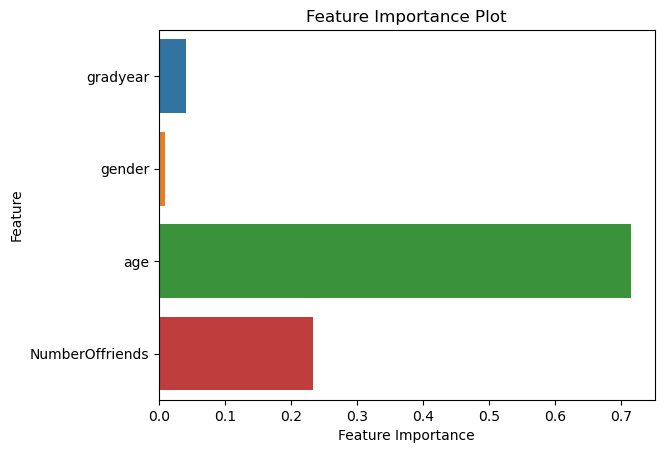

In [79]:
feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance Plot')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [55]:
print("Predictions on Testing Dataset:")
print(y_pred)

Predictions on Testing Dataset:
[[0.22       0.07       0.07       ... 0.02       0.06       0.02      ]
 [0.50033333 0.52016667 0.7505     ... 0.41016667 0.7805     1.16066667]
 [0.         0.04       0.         ... 0.         0.02       0.        ]
 ...
 [0.24       0.31666667 0.7        ... 0.48333333 0.04       0.41333333]
 [0.15382742 0.30579987 0.63069125 ... 0.         0.         0.        ]
 [0.24533333 0.00833333 0.03       ... 0.09741667 0.1        0.        ]]
